In [1]:
import pandas as pd
import glob
!pwd

/home/andre/Projects/spaceapps/geoserver/maps/preprocessing


In [2]:
input = "../datalake/br/*"
files = list(glob.glob(input))
df = [pd.read_csv(file) for file in files]
df = pd.concat(df)
df

,lat,lon,time,gws_inst,rtzsm_inst,sfsm_inst,state,city
0,-33.625,-53.375,2010-01-04,80.179880,74.646080,83.529170,RS,Chuí
1,-33.375,-53.375,2010-01-04,71.020065,74.160010,82.604500,RS,Santa Vitória do Palmar
2,-33.375,-53.125,2010-01-04,78.954580,79.721900,81.842804,RS,Santa Vitória do Palmar
3,-33.125,-53.125,2010-01-04,71.283560,80.168270,82.095470,RS,Santa Vitória do Palmar
4,-33.125,-52.875,2010-01-04,79.603455,75.477730,77.364740,RS,Santa Vitória do Palmar
...,...,...,...,...,...,...,...,...
10886,3.375,-60.875,2012-11-05,40.646732,30.909180,29.000620,RR,Boa Vista
10887,3.375,-60.625,2012-11-05,36.679010,27.801037,25.270752,RR,Boa Vista
10888,3.625,-61.125,2012-11-05,50.919300,50.367110,48.860360,RR,Boa Vista
10889,3.625,-60.875,2012-11-05,41.612724,29.780480,28.198622,RR,Boa Vista


In [4]:
df.describe()

,lat,lon,gws_inst,rtzsm_inst,sfsm_inst
count,1.155535e+07,1.155535e+07,1.155535e+07,1.155535e+07,1.155535e+07
mean,-1.114564e+01,-5.276658e+01,4.598391e+01,4.755635e+01,4.702791e+01
std,7.803136e+00,8.521816e+00,3.065720e+01,3.003930e+01,3.024087e+01
min,-3.362500e+01,-7.387500e+01,2.197802e-01,2.197802e-01,2.197802e-01
25%,-1.637500e+01,-5.887500e+01,1.874004e+01,2.158944e+01,2.029623e+01
50%,-9.875000e+00,-5.237500e+01,4.460097e+01,4.631704e+01,4.630046e+01
75%,-5.125000e+00,-4.637500e+01,7.276834e+01,7.334184e+01,7.376129e+01
max,3.625000e+00,-3.487500e+01,1.000000e+02,1.000000e+02,1.000000e+02


Divergência entre processamentos 

In [5]:
df["year"] = df["time"].str.slice(0, 5)

Correto 27. 28 estados devido a divergência do processamento.

In [6]:
df['state'].nunique()

28

In [7]:
 df[df['state'].str.len() == 3]

,lat,lon,time,gws_inst,rtzsm_inst,sfsm_inst,state,city,year
0,-33.625,-53.375,2010-01-04,80.179880,74.646080,83.529170,RS,Chuí,2010
1,-33.375,-53.375,2010-01-04,71.020065,74.160010,82.604500,RS,Santa Vitória do Palmar,2010
2,-33.375,-53.125,2010-01-04,78.954580,79.721900,81.842804,RS,Santa Vitória do Palmar,2010
3,-33.125,-53.125,2010-01-04,71.283560,80.168270,82.095470,RS,Santa Vitória do Palmar,2010
4,-33.125,-52.875,2010-01-04,79.603455,75.477730,77.364740,RS,Santa Vitória do Palmar,2010
...,...,...,...,...,...,...,...,...,...
10886,3.375,-60.875,2012-11-05,40.646732,30.909180,29.000620,RR,Boa Vista,2012
10887,3.375,-60.625,2012-11-05,36.679010,27.801037,25.270752,RR,Boa Vista,2012
10888,3.625,-61.125,2012-11-05,50.919300,50.367110,48.860360,RR,Boa Vista,2012
10889,3.625,-60.875,2012-11-05,41.612724,29.780480,28.198622,RR,Boa Vista,2012


In [8]:
states_grouped = df[df['state'].str.len() == 3].groupby(["state", "year"])

In [9]:
states_grouped_mean = states_grouped.mean(["gws_inst", "rtzsm_inst", "sfsm_inst"])

In [10]:
states_grouped_mean

lat        lon   gws_inst  rtzsm_inst  sfsm_inst
state year                                                         
 AC    2003  -8.982353 -70.435294  85.230030   84.127351  81.322280
       2004  -8.982353 -70.435294  88.667989   87.563640  84.830168
       2005  -8.982353 -70.435294  69.862005   66.007856  64.498043
       2006  -8.982353 -70.435294  56.594629   56.447454  55.057596
       2007  -8.982353 -70.435294  88.146307   86.713856  85.452975
...                ...        ...        ...         ...        ...
 TO    2019 -10.150886 -48.361376   7.236352   15.344550  18.040868
       2020 -10.150886 -48.361376   9.372357   19.929707  20.686479
       2021 -10.150886 -48.361376  10.294276   25.285417  26.808227
       2022 -10.150886 -48.361376  31.764382   32.526966  33.732908
       2023 -10.150886 -48.361376  25.759448   20.907511  22.891209

[567 rows x 5 columns]

In [11]:
states_grouped_mean.to_csv("../datalake/grace_br_states_mean_grouped_by_year.csv")

In [12]:
br_grouped = df[df['state'].str.len() == 3].groupby(["year"])

In [13]:
br_grouped = br_grouped.mean(["gws_inst", "rtzsm_inst", "sfsm_inst"])

In [20]:
br_grouped

,lat,lon,gws_inst,rtzsm_inst,sfsm_inst
year,,,,,
2003,-11.088498,-52.597425,49.928174,53.106092,53.555981
2004,-11.088498,-52.597425,64.645542,61.972320,61.903462
2005,-11.088498,-52.597425,45.798863,46.079499,45.825481
2006,-11.088498,-52.597425,55.527643,54.484008,54.376321
2007,-11.088498,-52.597425,56.252008,55.008701,55.321882
2008,-11.088498,-52.597425,59.635770,60.610538,60.212684
2009,-11.088498,-52.597425,66.520236,65.778559,65.451399
2010,-11.088498,-52.597425,48.520116,47.796353,46.835105
2011,-11.088498,-52.597425,56.458967,55.376818,54.041615


In [15]:
br_grouped.to_csv("../datalake/grace_br_mean_grouped_by_year.csv")

In [40]:
br_df = br_grouped.reset_index()
states_grouped_mean = states_grouped_mean.reset_index()

#x = y.index
x = br_df["year"]

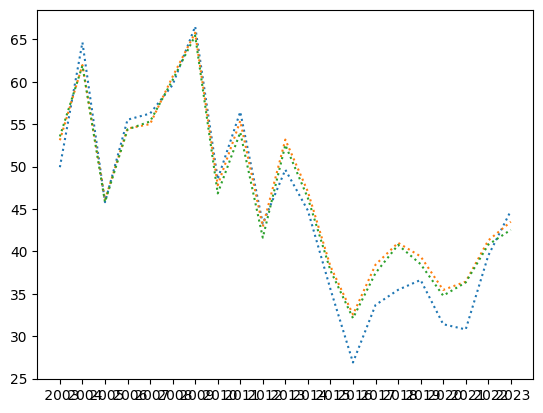

In [41]:
import matplotlib.pyplot as plt
plt.plot(x, br_df["gws_inst"], linestyle = 'dotted')
plt.plot(x, br_df["rtzsm_inst"], linestyle = 'dotted')
plt.plot(x, br_df["sfsm_inst"], linestyle = 'dotted')
plt.show()

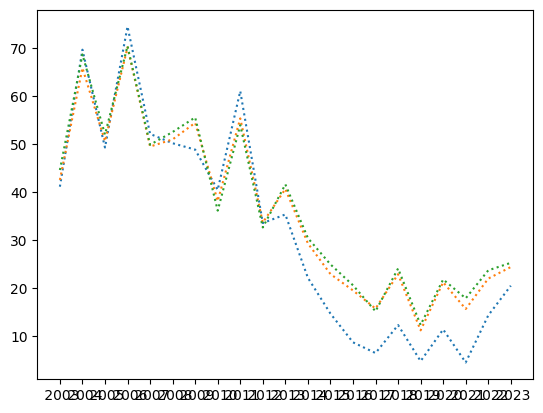

In [54]:
import matplotlib.pyplot as plt

df_state = states_grouped_mean[states_grouped_mean["state"] == " GO"]
plt.plot(df_state["year"], df_state["gws_inst"], linestyle = 'dotted')
plt.plot(df_state["year"], df_state["rtzsm_inst"], linestyle = 'dotted')
plt.plot(df_state["year"], df_state["sfsm_inst"], linestyle = 'dotted')
plt.show()

In [ ]:
df[df['state'].str.len() == 3].groupby(["year"])